In [6]:
import os
import cv2 as cv
import glob as gb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Model, layers, Sequential, optimizers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow import keras
from tensorflow.keras import callbacks, layers, Model

In [7]:
train_dir='../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
valid_dir='../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'
test_dir='../input/new-plant-diseases-dataset/test/test'

In [8]:
Size=224
X_test=[]
y_test=[]

# Data augmentation : rotation, translation, zoom,horizontal flip,rescaling

In [9]:
import tensorflow as tf
train_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    rescale=1/255.0,
).flow_from_directory(train_dir,batch_size=16,target_size=(Size,Size),subset="training",shuffle=True)


Found 70295 images belonging to 38 classes.


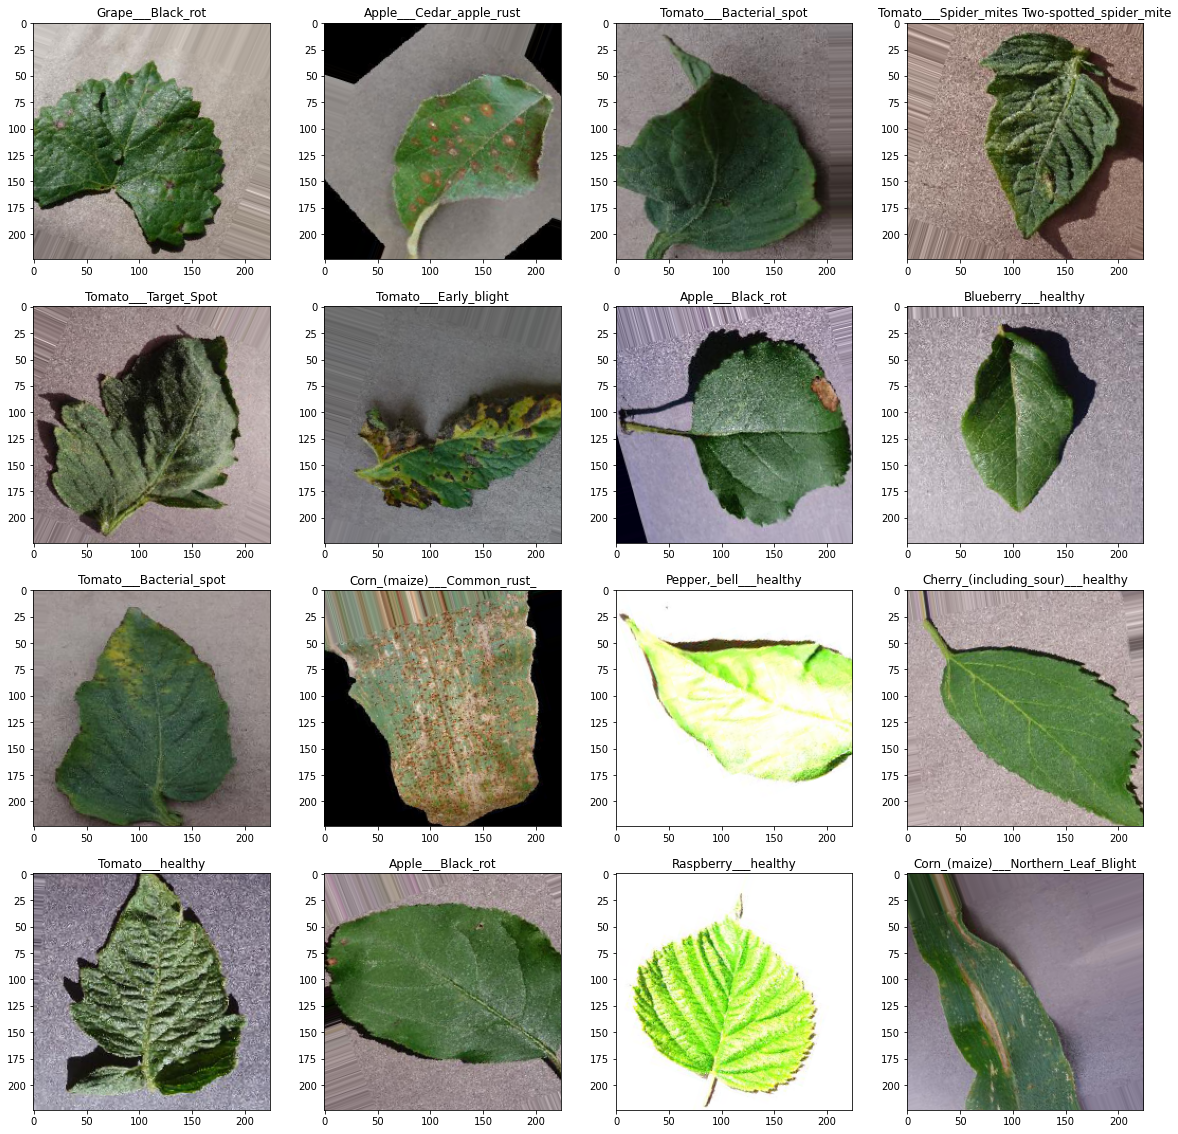

In [10]:
classes=list(train_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in train_generator:
    
    for i in range(0,16):
        plt.subplot(4,4,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])
    # show the plot
    plt.show()
    break

In [11]:
print(classes)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [12]:
valid_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
).flow_from_directory(valid_dir,batch_size=16,target_size=(Size,Size),shuffle=False)


Found 17572 images belonging to 38 classes.


In [13]:
X_test=[]
for folder in os.listdir(test_dir):
    files=gb.glob(test_dir+'/*.JPG')
    for file in files :
        img=cv.imread(file)
        X_test.append(cv.resize(img,(Size,Size)))

In [14]:
X_test=np.array(X_test)
print(X_test.shape)

(1089, 224, 224, 3)


In [15]:
X_test=X_test/255.0

In [16]:
import keras
from keras.layers import Flatten , Dense , Dropout , BatchNormalization , MaxPooling2D ,Conv2D
from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping ,ReduceLROnPlateau ,ModelCheckpoint

#from keras.applications import vgg19

In [17]:
EarlyStop=EarlyStopping(patience=10,restore_best_weights=True)
Reduce_LR=ReduceLROnPlateau(monitor='val_accuracy',verbose=2,factor=0.5,min_lr=0.00001)
model_check=ModelCheckpoint('model.hdf5',monitor='val_loss',verbose=1,save_best_only=True)
callback=[EarlyStop , Reduce_LR,model_check]

# AlexNet architecture

In [18]:
alexnet=Sequential([
                Conv2D(96,11,activation='relu',strides=4,input_shape=(Size,Size,3)),
                BatchNormalization(),
                MaxPooling2D(3,strides=2),
    
                
                Conv2D(256,5,activation='relu',strides=1),
                MaxPooling2D(3,strides=2),
    
                Conv2D(384,3,activation='relu',strides=1),
                Conv2D(384,3,activation='relu',strides=1),
                Conv2D(256,3,activation='relu',strides=1),
                MaxPooling2D(3,strides=2),
                Flatten(),
                Dense(4096,activation='relu'),
                Dense(4096,activation='relu'),
                Dense(38,activation='softmax')
])

In [19]:
alexnet.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
history=alexnet.fit(train_generator,validation_data=valid_generator,epochs=100,batch_size=32,
                  steps_per_epoch=len(train_generator)//16,validation_steps=len(valid_generator)//16,
                  callbacks=callback, verbose=1)

Epoch 1/100
274/274 [==============================] - 198s 719ms/step - loss: 3.5971 - accuracy: 0.0463 - val_loss: 3.6099 - val_accuracy: 0.0000e+00

Epoch 00001: val_loss improved from inf to 3.60988, saving model to model.hdf5
Epoch 2/100
274/274 [==============================] - 196s 716ms/step - loss: 3.4230 - accuracy: 0.0705 - val_loss: 3.4351 - val_accuracy: 0.0276

Epoch 00002: val_loss improved from 3.60988 to 3.43514, saving model to model.hdf5
Epoch 3/100
274/274 [==============================] - 194s 708ms/step - loss: 3.2992 - accuracy: 0.1008 - val_loss: 3.8252 - val_accuracy: 0.0147

Epoch 00003: val_loss did not improve from 3.43514
Epoch 4/100
274/274 [==============================] - 193s 704ms/step - loss: 3.1220 - accuracy: 0.1243 - val_loss: 3.8213 - val_accuracy: 0.0018

Epoch 00004: val_loss did not improve from 3.43514
Epoch 5/100
274/274 [==============================] - 192s 701ms/step - loss: 2.9494 - accuracy: 0.1690 - val_loss: 3.5698 - val_accuracy: 

In [21]:
ModelLoss, ModelAccuracy = alexnet.evaluate(valid_generator)
print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

1099/1099 [==============================] - 194s 177ms/step - loss: 1.4234 - accuracy: 0.5528
Test Loss is 1.4233845472335815
Test Accuracy is 0.5528112649917603


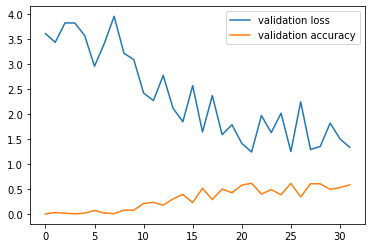

In [22]:
plt.plot(history.history['val_loss'],label='validation loss')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.legend()

In [23]:
alexnet_accuracy = history.history['val_accuracy'][len(history.history['val_accuracy'])-1]

# VGG16

In [24]:

vgg16 = tf.keras.applications.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(Size,Size,3)
)
vgg16.trainable = False



Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/keras-applications/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5: None -- [Errno -3] Temporary failure in name resolution

In [ ]:
# Define the layers
inputs = keras.Input(shape=(Size,Size,3))

# Get the layer
x = vgg16(inputs, training = False)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(4096, activation="relu")(x)
x = tf.keras.layers.Dense(4096, activation="relu")(x)

x = tf.keras.layers.Dense(38, activation="softmax")(x)

VGG16 = Model(inputs=inputs, outputs=x)

In [ ]:
VGG16.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=VGG16.fit(train_generator,validation_data=valid_generator,epochs=100,batch_size=32,
                  steps_per_epoch=len(train_generator)//16,validation_steps=len(valid_generator)//16,
                  callbacks=callback, verbose=1)

In [ ]:
ModelLoss, ModelAccuracy = VGG16.evaluate(valid_generator)
print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

In [ ]:
plt.plot(history.history['val_loss'],label='validation loss')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.legend()

In [ ]:
vgg16_accuracy = history.history['val_accuracy'][len(history.history['val_accuracy'])-1]

# MobileNetV2

In [ ]:

mbnet_v2 = tf.keras.applications.MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=(Size,Size,3)
)
mbnet_v2.trainable = False

In [ ]:
# Define the layers
inputs = keras.Input(shape=(Size,Size,3))

# Get the layer
x = mbnet_v2(inputs, training = False)

# Stack layers further
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(4096, activation="relu")(x)
x = tf.keras.layers.Dense(4096, activation="relu")(x)

x = tf.keras.layers.Dense(38, activation="softmax")(x)


# Combine the model
mobilenet2 = Model(inputs=inputs, outputs=x)

# Summary
mobilenet2.summary()



In [ ]:
mobilenet2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=mobilenet2.fit(train_generator,validation_data=valid_generator,epochs=100,batch_size=32,
                  steps_per_epoch=len(train_generator)//16,validation_steps=len(valid_generator)//16,
                  callbacks=callback, verbose=1)

In [ ]:
ModelLoss, ModelAccuracy = mobilenet2.evaluate(valid_generator)
print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy))

In [ ]:
plt.plot(history.history['val_loss'],label='validation loss')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.legend()

In [ ]:
mobilenetv2_accuracy = history.history['val_accuracy'][len(history.history['val_accuracy'])-1]

# Inception model

In [ ]:
inception_model = InceptionV3(input_shape= (Size, Size, 3),
                                include_top = False,
                                weights = "imagenet")



for layer in inception_model.layers:
    layer.trainable = False


# Taking output from 'mixed8' layer
last_layer = inception_model.get_layer('mixed9')
print('Last Layer Output Shape:', last_layer.output_shape)
last_output = last_layer.output


x = layers.Flatten()(last_output)

x = layers.Dense(2048, activation='relu')(x)

x = layers.Dense(1024, activation='relu')(x)

x = layers.Dropout(0.2)(x)

x = layers.Dense(38, activation='softmax')(x)

inception3 = Model(inception_model.input, x)





In [ ]:
inception3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=inception3.fit(train_generator,validation_data=valid_generator,epochs=100,batch_size=32,
                  steps_per_epoch=len(train_generator)//16,validation_steps=len(valid_generator)//16,
                  callbacks=callback, verbose=1)

In [ ]:
ModelLoss, ModelAccuracy = inception3.evaluate(valid_generator)
print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy))

In [ ]:
plt.plot(history.history['val_loss'],label=' validation loss')
plt.plot(history.history['val_accuracy'],label=' validation accuracy')
plt.legend()

In [ ]:
inceptionv3_accuracy = history.history['val_accuracy'][len(history.history['val_accuracy'])-1]

# Resnet-50

In [ ]:
resnet50 = tf.keras.applications.resnet50.ResNet50(
    include_top=False,
    input_shape= (img_width, img_height, channels),
    weights='imagenet'
)
# resnet50.summary()

In [ ]:
model = Sequential()
for layer in resnet50.layers:
    layer.trainable = False #o turn off VGG19's trainable weights
model.add(resnet50)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
# model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dense(39, activation='softmax'))
model.summary()

In [ ]:
# To select the optimizer ans the loss
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()

In [ ]:
# Compile the model
model.compile(optimizer=optimizer, loss=loss_object, metrics=['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint(
    'model.h5',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='auto',
    save_weights_only=False,
    period=1
)
earlystop = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=3,
    verbose=1,
    mode='auto'
)
csvlogger = CSVLogger(
    filename= "training_csv.log",
    separator = ",",
    append = False
)
reduceLR = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    verbose=1, 
    mode='auto'
)
callbacks = [checkpoint, earlystop, csvlogger,reduceLR]

In [ ]:
### To fit the model
history = model.fit(
    normalized_train_ds, 
    epochs = 10,
    validation_data = normalized_test_ds, 
    callbacks = callbacks,
    shuffle = True
)

In [ ]:
model.evaluate(normalized_test_ds)

# Model selection

In [ ]:
models = ["alexnet","vgg16","mobilenetv2","inceptionv3","resnet-50"]
Models = [alexnet,VGG16,mobilenet2,inception3,resnet-50]

accuracies = [alexnet_accuracy,vgg16_accuracy,mobilenetv2_accuracy,inceptionv3_accuracy]

best_model_index = accuracies.index(max(accuracies))
print("best performing model :",models[best_model_index])
best_model_name = models[best_model_index]
best_model = Models[best_model_index]

# metrics applied on best model

In [ ]:
predictions=best_model.predict(valid_generator)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(valid_generator.classes, predictions.argmax(axis=1)))

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(valid_generator.classes, predictions.argmax(axis=1))
plt.figure(figsize=(20,20))
sns.heatmap(cm,  annot=True, fmt="d" ,cmap="YlGnBu")

# Inference on new examples

test data are already resized, no additional preprocessing needed

In [ ]:
y_pred=best_model.predict(X_test)

In [ ]:
y_pred[0]

In [ ]:
predictions=y_pred.argmax(axis=1)

In [ ]:
classes

In [ ]:
predictions

In [ ]:
predictions[0]

In [ ]:
plt.imshow(X_test[0])
plt.title(classes[predictions[0]])
plt.show()

# Save the model

In [ ]:
best_model.save("plant_disease_detection.h5")




In [ ]:
import json

from IPython.display import FileLink

# Link the files
FileLink("./plant_disease_detection.h5")

